### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

In [6]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

This notebook demonstrates how to do the following:
1. Create a list of chemical randomly drawn from HMDB.
2. Create a new mass spec object, takes chemicals as input.
3. Create a new controller and runs the mass spec.
4. Write mzml files.

Load densities trained on 19 beer data (see [loader_kde](loader_kde.ipynb)).

In [7]:
base_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\'

In [8]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'

In [9]:
ps = load_obj(os.path.join(base_dir, 'Trained Models\\peak_sampler_19_beers_fullscan.p'))

Load chromatogram data exported from R

In [10]:
cc = ChromatogramCreator(os.path.join(base_dir, 'Trained Models\\chromatogram_19_beers.csv.gz'))

INFO:ChromatogramCreator:Loading 0 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 1674
DEBUG:ChromatogramCreator:Invalid chromatogram 1778
DEBUG:ChromatogramCreator:Invalid chromatogram 1932
DEBUG:ChromatogramCreator:Invalid chromatogram 1989
DEBUG:ChromatogramCreator:Invalid chromatogram 2052
DEBUG:ChromatogramCreator:Invalid chromatogram 2276
DEBUG:ChromatogramCreator:Invalid chromatogram 2296
DEBUG:ChromatogramCreator:Invalid chromatogram 2424
DEBUG:ChromatogramCreator:Invalid chromatogram 2557
DEBUG:ChromatogramCreator:Invalid chromatogram 2559
DEBUG:ChromatogramCreator:Invalid chromatogram 2586
DEBUG:ChromatogramCreator:Invalid chromatogram 2610
DEBUG:ChromatogramCreator:Invalid chromatogram 3173
DEBUG:ChromatogramCreator:Invalid chromatogram 3208
DEBUG:ChromatogramCreator:Invalid chromatogram 3238
DEBUG:ChromatogramCreator:Invalid chromatogram 3252
DEBUG:ChromatogramCreator:Invalid chromatogram 3484
DEBUG:ChromatogramCreator:Invalid chromatogram 3547
DEBUG:Chromatog

DEBUG:ChromatogramCreator:Invalid chromatogram 43082
DEBUG:ChromatogramCreator:Invalid chromatogram 43485
DEBUG:ChromatogramCreator:Invalid chromatogram 43529
DEBUG:ChromatogramCreator:Invalid chromatogram 43936
DEBUG:ChromatogramCreator:Invalid chromatogram 43996
DEBUG:ChromatogramCreator:Invalid chromatogram 44322
DEBUG:ChromatogramCreator:Invalid chromatogram 44788
INFO:ChromatogramCreator:Loading 45000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 45111
DEBUG:ChromatogramCreator:Invalid chromatogram 45951
DEBUG:ChromatogramCreator:Invalid chromatogram 45979
DEBUG:ChromatogramCreator:Invalid chromatogram 46300
DEBUG:ChromatogramCreator:Invalid chromatogram 46346
DEBUG:ChromatogramCreator:Invalid chromatogram 46596
DEBUG:ChromatogramCreator:Invalid chromatogram 46609
DEBUG:ChromatogramCreator:Invalid chromatogram 46638
DEBUG:ChromatogramCreator:Invalid chromatogram 46817
DEBUG:ChromatogramCreator:Invalid chromatogram 47544
DEBUG:ChromatogramCreator:Invalid chromatogram

DEBUG:ChromatogramCreator:Invalid chromatogram 77285
DEBUG:ChromatogramCreator:Invalid chromatogram 77309
DEBUG:ChromatogramCreator:Invalid chromatogram 77404
DEBUG:ChromatogramCreator:Invalid chromatogram 77551
DEBUG:ChromatogramCreator:Invalid chromatogram 77656
DEBUG:ChromatogramCreator:Invalid chromatogram 77778
DEBUG:ChromatogramCreator:Invalid chromatogram 78411
DEBUG:ChromatogramCreator:Invalid chromatogram 78413
DEBUG:ChromatogramCreator:Invalid chromatogram 78658
DEBUG:ChromatogramCreator:Invalid chromatogram 78754
DEBUG:ChromatogramCreator:Invalid chromatogram 78857
DEBUG:ChromatogramCreator:Invalid chromatogram 79144
DEBUG:ChromatogramCreator:Invalid chromatogram 79169
DEBUG:ChromatogramCreator:Invalid chromatogram 79322
DEBUG:ChromatogramCreator:Invalid chromatogram 79363
INFO:ChromatogramCreator:Loading 80000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 80563
DEBUG:ChromatogramCreator:Invalid chromatogram 80695
DEBUG:ChromatogramCreator:Invalid chromatogram

DEBUG:ChromatogramCreator:Invalid chromatogram 105782
DEBUG:ChromatogramCreator:Invalid chromatogram 106020
DEBUG:ChromatogramCreator:Invalid chromatogram 106084
DEBUG:ChromatogramCreator:Invalid chromatogram 106385
DEBUG:ChromatogramCreator:Invalid chromatogram 106418
DEBUG:ChromatogramCreator:Invalid chromatogram 106429
DEBUG:ChromatogramCreator:Invalid chromatogram 106995
DEBUG:ChromatogramCreator:Invalid chromatogram 107155
DEBUG:ChromatogramCreator:Invalid chromatogram 107174
DEBUG:ChromatogramCreator:Invalid chromatogram 107601
DEBUG:ChromatogramCreator:Invalid chromatogram 107628
DEBUG:ChromatogramCreator:Invalid chromatogram 108028
DEBUG:ChromatogramCreator:Invalid chromatogram 108197
DEBUG:ChromatogramCreator:Invalid chromatogram 108439
DEBUG:ChromatogramCreator:Invalid chromatogram 108492
DEBUG:ChromatogramCreator:Invalid chromatogram 108538
DEBUG:ChromatogramCreator:Invalid chromatogram 108781
DEBUG:ChromatogramCreator:Invalid chromatogram 108856
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 133306
DEBUG:ChromatogramCreator:Invalid chromatogram 133322
DEBUG:ChromatogramCreator:Invalid chromatogram 133426
DEBUG:ChromatogramCreator:Invalid chromatogram 133789
DEBUG:ChromatogramCreator:Invalid chromatogram 133832
DEBUG:ChromatogramCreator:Invalid chromatogram 133882
DEBUG:ChromatogramCreator:Invalid chromatogram 134113
DEBUG:ChromatogramCreator:Invalid chromatogram 134199
DEBUG:ChromatogramCreator:Invalid chromatogram 134241
DEBUG:ChromatogramCreator:Invalid chromatogram 134262
DEBUG:ChromatogramCreator:Invalid chromatogram 134320
DEBUG:ChromatogramCreator:Invalid chromatogram 134488
DEBUG:ChromatogramCreator:Invalid chromatogram 134876
DEBUG:ChromatogramCreator:Invalid chromatogram 134942
INFO:ChromatogramCreator:Loading 135000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 135316
DEBUG:ChromatogramCreator:Invalid chromatogram 135591
DEBUG:ChromatogramCreator:Invalid chromatogram 135700
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 156966
DEBUG:ChromatogramCreator:Invalid chromatogram 157243
DEBUG:ChromatogramCreator:Invalid chromatogram 157263
DEBUG:ChromatogramCreator:Invalid chromatogram 157289
DEBUG:ChromatogramCreator:Invalid chromatogram 157581
DEBUG:ChromatogramCreator:Invalid chromatogram 157622
DEBUG:ChromatogramCreator:Invalid chromatogram 157634
DEBUG:ChromatogramCreator:Invalid chromatogram 157816
DEBUG:ChromatogramCreator:Invalid chromatogram 157994
DEBUG:ChromatogramCreator:Invalid chromatogram 158645
DEBUG:ChromatogramCreator:Invalid chromatogram 158694
DEBUG:ChromatogramCreator:Invalid chromatogram 158748
DEBUG:ChromatogramCreator:Invalid chromatogram 159050
DEBUG:ChromatogramCreator:Invalid chromatogram 159105
DEBUG:ChromatogramCreator:Invalid chromatogram 159200
DEBUG:ChromatogramCreator:Invalid chromatogram 159202
DEBUG:ChromatogramCreator:Invalid chromatogram 159435
DEBUG:ChromatogramCreator:Invalid chromatogram 159725
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 178416
DEBUG:ChromatogramCreator:Invalid chromatogram 178585
DEBUG:ChromatogramCreator:Invalid chromatogram 178668
DEBUG:ChromatogramCreator:Invalid chromatogram 178731
DEBUG:ChromatogramCreator:Invalid chromatogram 179006
DEBUG:ChromatogramCreator:Invalid chromatogram 179153
DEBUG:ChromatogramCreator:Invalid chromatogram 179396
DEBUG:ChromatogramCreator:Invalid chromatogram 179412
DEBUG:ChromatogramCreator:Invalid chromatogram 179798
DEBUG:ChromatogramCreator:Invalid chromatogram 179928
INFO:ChromatogramCreator:Loading 180000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 180009
DEBUG:ChromatogramCreator:Invalid chromatogram 180180
DEBUG:ChromatogramCreator:Invalid chromatogram 180284
DEBUG:ChromatogramCreator:Invalid chromatogram 180348
DEBUG:ChromatogramCreator:Invalid chromatogram 180396
DEBUG:ChromatogramCreator:Invalid chromatogram 180507
DEBUG:ChromatogramCreator:Invalid chromatogram 180551
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 196117
DEBUG:ChromatogramCreator:Invalid chromatogram 197009
DEBUG:ChromatogramCreator:Invalid chromatogram 197029
DEBUG:ChromatogramCreator:Invalid chromatogram 197149
DEBUG:ChromatogramCreator:Invalid chromatogram 197178
DEBUG:ChromatogramCreator:Invalid chromatogram 197197
DEBUG:ChromatogramCreator:Invalid chromatogram 197336
DEBUG:ChromatogramCreator:Invalid chromatogram 197353
DEBUG:ChromatogramCreator:Invalid chromatogram 197398
DEBUG:ChromatogramCreator:Invalid chromatogram 197492
DEBUG:ChromatogramCreator:Invalid chromatogram 197493
DEBUG:ChromatogramCreator:Invalid chromatogram 197576
DEBUG:ChromatogramCreator:Invalid chromatogram 197656
DEBUG:ChromatogramCreator:Invalid chromatogram 197873
DEBUG:ChromatogramCreator:Invalid chromatogram 197901
DEBUG:ChromatogramCreator:Invalid chromatogram 198085
DEBUG:ChromatogramCreator:Invalid chromatogram 198250
DEBUG:ChromatogramCreator:Invalid chromatogram 198293
DEBUG:ChromatogramCreator:In

### Generate some chemicals

In [11]:
hmdb = load_obj(os.path.join(base_dir, 'Trained Models\\hmdb_compounds.p'))

In [46]:
min_ms1_intensity = 2.5E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]
n_ms1_peaks = 10000

# alpha = 0.1
# compound_list = hmdb
# chemical_type = 'Known'

alpha = math.inf
compound_list = None
chemical_type = 'Unknown'
ms_levels = 1

chemicals = ChemicalCreator(ps)
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, n_ms1_peaks, ms_levels=ms_levels, chemical_type=chemical_type,
               formula_list=None, compound_list=compound_list, alpha=alpha, fixed_mz=False)

UnknownChemical mz=355.9987 rt=404.19 max_intensity=1208637.99
[ 682647.8  622902.9 1187863.   789348.9 1208654.   651175.2  910543.9]


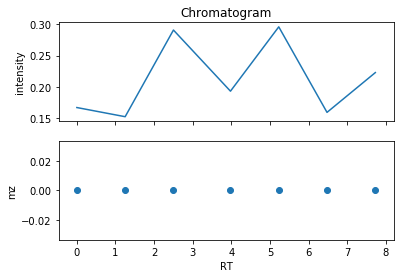

UnknownChemical mz=386.7001 rt=591.21 max_intensity=383860.98
[297086.4 299565.3 383860.9 317544.8 366665.  326276.  338810.7 298274.8
 270351.7 304761.1 189411.1 133363.3]


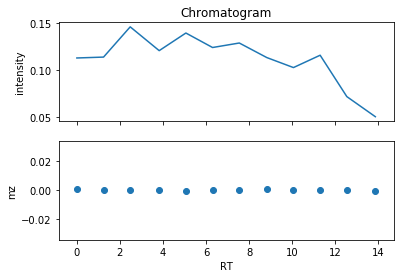

UnknownChemical mz=249.6689 rt=499.03 max_intensity=4151288.58
[ 222931.2    98184.38  432564.    627598.6   421687.    753591.1
  563115.8   620558.7   953038.8  1193124.   1126573.   1206650.
 1245190.   1746613.   1322969.   1629774.   2652771.   1900872.
 2053218.   2471702.   1493232.   2196732.   2273481.   2491809.
 2525466.   2900792.   3689300.   1327602.   4151397.   2217598.
 2763594.   2614573.   2203847.   1611177.    963140.1   861964.
 1025734.   1262632.    821066.5   532381.9   585041.6   503169.7 ]


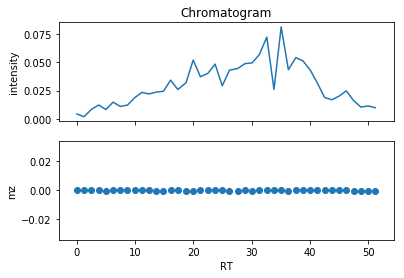

UnknownChemical mz=97.8799 rt=990.44 max_intensity=2928800.57
[ 372148.8  592133.6 1288675.  2384689.  2887496.  2928844.  2357383.
 2327209.  1532548.  1115503.   852553.7  512628.7]


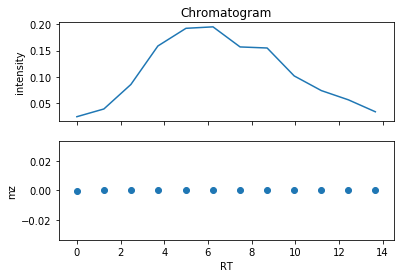

UnknownChemical mz=108.5713 rt=400.61 max_intensity=1511419.94
[1349827.  1455982.  1462378.  1471552.  1511411.  1214006.  1099775.
 1096064.   833830.2]


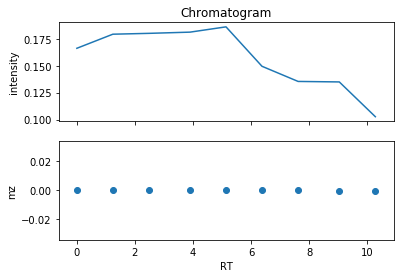

UnknownChemical mz=110.7538 rt=1234.24 max_intensity=948000.90
[873801.2 902072.4 862931.9 947995.1 695832.2 887009.4 737868.7 638500.9
 707675.9 589126.4 399063.8 114929.5 183819.8 169289.3]


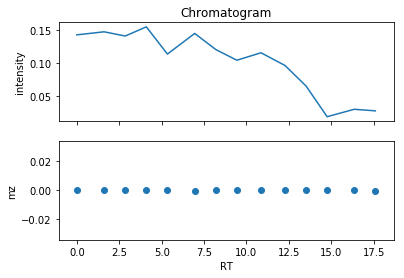

UnknownChemical mz=101.8892 rt=468.69 max_intensity=789419.50
[146003.5 170055.1 147331.4 163978.5 180465.  149390.4 185090.3 161250.4
 150522.9 183274.7 159823.  173792.9 130056.2 177956.9 159040.7 165250.9
 169805.3 154187.5 157812.  193835.  190562.1 172407.9 166317.2 188108.4
 188613.6 159570.9 166813.1 178577.5 182539.3 157187.3 150716.4 198456.1
 164100.9 144763.  170960.  169672.9 147365.7 182412.  159567.3 181479.8
 190404.  180456.4 175566.6 163077.2 177779.5 164448.  126996.7 171657.4
 198123.3 165039.3 150067.5 178626.5 175233.4 193523.  190341.  185313.8
 221263.8 180058.1 231472.9 312635.2 349936.3 446901.9 605948.8 654784.8
 618929.8 789417.8]


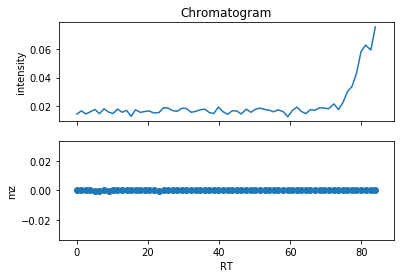

UnknownChemical mz=272.5823 rt=187.73 max_intensity=346714.33
[113072.1  179259.8  287727.1  297899.1  312816.8  346710.4  167383.4
  39939.12]


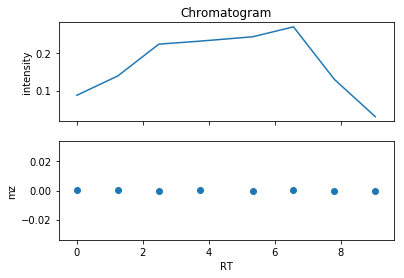

UnknownChemical mz=191.2065 rt=186.00 max_intensity=280222.12
[115034.4  121901.3  125202.8  190959.   151504.2  280219.   169493.1
  58307.03  77400.37]


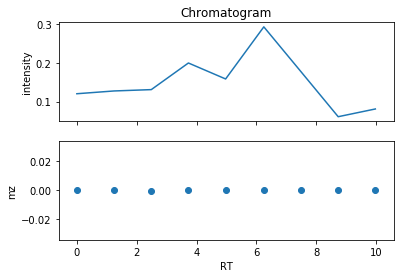

UnknownChemical mz=445.4362 rt=362.20 max_intensity=262509.14
[171731.9 249066.2 251308.1 225180.5 261025.2 262507.4 119720.8 150153.8
 142782.1]


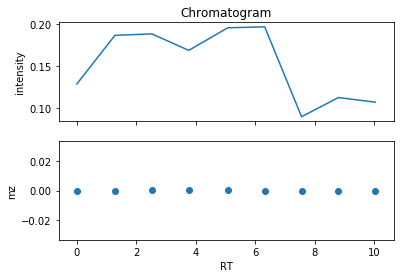

In [47]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

In [48]:
type(dataset[0])

VMSfunctions.Chemicals.UnknownChemical

### Set up a simple MS1 controller

In [49]:
set_log_level_warning() # We don't want to see too many messages as the controller is running

In [50]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.make_plot = False
controller.run(rt_range[0][0], rt_range[0][1])

1080.096504006151it [03:07,  5.75it/s]                                                                                                                                                                  


Print the peaks generated for each chemical

In [51]:
chem = controller.mass_spec.chemicals[0]
peaks = controller.mass_spec.chemicals_to_peaks[chem]
print(chem)
for i in range(len(peaks)):
    p = peaks[i]
    print(p)
    if i >= 3:
        break

UnknownChemical mz=355.9987 rt=404.19 max_intensity=1208637.99
Peak mz=357.0061 rt=404.19 intensity=202004.66 ms_level=1
Peak mz=357.0060 rt=404.52 intensity=197379.69 ms_level=1
Peak mz=357.0060 rt=404.79 intensity=193532.53 ms_level=1
Peak mz=357.0060 rt=404.90 intensity=192006.32 ms_level=1


In [52]:
all_peaks = []
for chem in controller.mass_spec.chemicals_to_peaks:
    all_peaks.extend(controller.mass_spec.chemicals_to_peaks[chem])
mzs = np.array([p.mz for p in all_peaks])
rts = np.array([p.rt for p in all_peaks])
intensities = np.array([p.intensity for p in all_peaks])

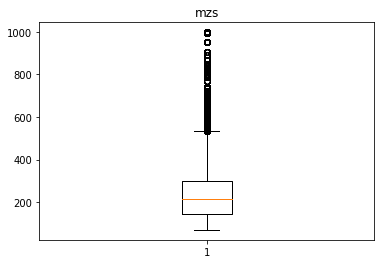

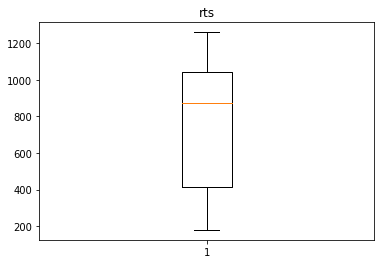

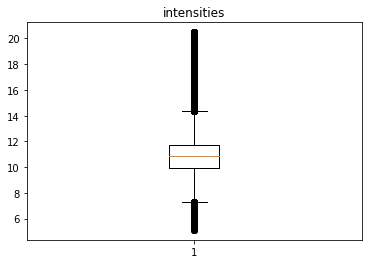

In [53]:
_ = plt.boxplot(mzs)
plt.title('mzs')
plt.show()

_ = plt.boxplot(rts)
plt.title('rts')
plt.show()

_ = plt.boxplot(np.log(intensities))
plt.title('intensities')
plt.show()

In [54]:
np.median(rts)

874.3637259089967

In [55]:
np.min(np.log(intensities)), np.max(np.log(intensities))

(5.124471000034177, 20.482639334016763)

Save to mzML file

In [56]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\B. CentWave\\mzML\\no_noise_ms1_controller.mzML'))
# run R script

In [57]:
save_obj(controller, os.path.join(base_dir, 'Manuscript\\B. CentWave\\no_noise_ms1_controller.p'))

### Set up a Top-N controller

We can run the dataset through a top-N DDA controller

In [36]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

In [37]:
ps = load_obj(os.path.join(base_dir, 'Trained Models\\peak_sampler_19_beers_fragmentation.p'))

In [38]:
min_ms1_intensity = 2.5E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]
n_ms1_peaks = 1000

# alpha = 0.1
# compound_list = hmdb
# chemical_type = 'Known'

alpha = math.inf
compound_list = None
chemical_type = 'Unknown'
ms_levels = 2

chemicals = ChemicalCreator(ps)
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, n_ms1_peaks, ms_levels=ms_levels, 
                           chemical_type=chemical_type, formula_list=None, compound_list=compound_list, alpha=alpha, fixed_mz=False)

DEBUG:ChemicalCreator:1000 ms1 peaks to be created.
DEBUG:ChemicalCreator:i = 0
DEBUG:ChemicalCreator:i = 25
DEBUG:ChemicalCreator:i = 50
DEBUG:ChemicalCreator:i = 75
DEBUG:ChemicalCreator:i = 100
DEBUG:ChemicalCreator:i = 125
DEBUG:ChemicalCreator:i = 150
DEBUG:ChemicalCreator:i = 175
DEBUG:ChemicalCreator:i = 200
DEBUG:ChemicalCreator:i = 225
DEBUG:ChemicalCreator:i = 250
DEBUG:ChemicalCreator:i = 275
DEBUG:ChemicalCreator:i = 300
DEBUG:ChemicalCreator:i = 325
DEBUG:ChemicalCreator:i = 350
DEBUG:ChemicalCreator:i = 375
DEBUG:ChemicalCreator:i = 400
DEBUG:ChemicalCreator:i = 425
DEBUG:ChemicalCreator:i = 450
DEBUG:ChemicalCreator:i = 475
DEBUG:ChemicalCreator:i = 500
DEBUG:ChemicalCreator:i = 525
DEBUG:ChemicalCreator:i = 550
DEBUG:ChemicalCreator:i = 575
DEBUG:ChemicalCreator:i = 600
DEBUG:ChemicalCreator:i = 625
DEBUG:ChemicalCreator:i = 650
DEBUG:ChemicalCreator:i = 675
DEBUG:ChemicalCreator:i = 700
DEBUG:ChemicalCreator:i = 725
DEBUG:ChemicalCreator:i = 750
DEBUG:ChemicalCreator:i

In [39]:
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window (Dalton) around a selected precursor ion
rt_tol = 15                     # the rt window (second) around a selected precursor ion to prevent it from fragmented multiple times
min_ms1_intensity = 2.5E5       # the minimum ms1 peak intensity to be fragmented

In [40]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms1_intensity)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

1080.0994838961374it [00:18, 58.93it/s]                                                                                                                                                                 


In [42]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\B. CentWave\\no_noise_top_N_controller.mzML'))

### Set up a DIA controller

We can run the dataset through a DIA controller

In [43]:
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [44]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

1080.1466399988512it [00:19, 56.83it/s]                                                                                                                                                                 


In [45]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\B. CentWave\\no_noise_dia_controller.mzML'))